# Imporing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('D:\Programacion\Datasets\job_placemen\job_placement.csv')

In [4]:
df

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
695,Male,23,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,Female,26,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,Male,24,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,Female,23,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [3]:
df.drop(['id','degree','name'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


# Data Cleaning

In [7]:
# Duplicated
df.duplicated().sum()

0

In [10]:
# Invalid Values
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(),end='\n\n')

name
Jack Garcia         33
Mia Wilson          33
Emma Martinez       33
Aiden Davis         33
Chloe Hernandez     32
                    ..
Oliver Martinez      1
Sophia Hernandez     1
Nathan Garcia        1
Emily Watson         1
John Doe             1
Name: count, Length: 66, dtype: int64

gender
Female    366
Male      334
Name: count, dtype: int64

degree
Bachelor's    700
Name: count, dtype: int64

stream
Computer Science                 214
Information Technology           152
Electrical Engineering           112
Mechanical Engineering           111
Electronics and Communication    111
Name: count, dtype: int64

college_name
University of Michigan--Ann Arbor            43
University of California--Berkeley           43
University of Colorado--Boulder              43
University of Illinois--Urbana-Champaign     43
University of Virginia                       43
University of North Carolina--Chapel Hill    42
University of Maryland--College Park         42
University of Califor

In [12]:
print(f'Checkeando edad:\nEdad minima: {df.age.min()}\nEdad maxima: {df.age.max()}\n')
print(f'Ckeckeando GPA:\nGPA minima: {df.gpa.min()}\nGPA maxima: {df.gpa.max()}\n')
print(f'Ckeckeando Años de experiencia:\nMinimo: {df.years_of_experience.min()}\nMaximo: {df.years_of_experience.max()}')

Checkeando edad:
Edad minima: 23
Edad maxima: 26

Ckeckeando GPA:
GPA minima: 3.4
GPA maxima: 3.9

Ckeckeando Años de experiencia:
Minimo: 1.0
Maximo: 3.0


In [14]:
# Missing Values
df.isna().sum()

name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

# EDA

In [5]:
sns.set_style('darkgrid')

Text(0.5, 0.98, 'Some relations of gender')

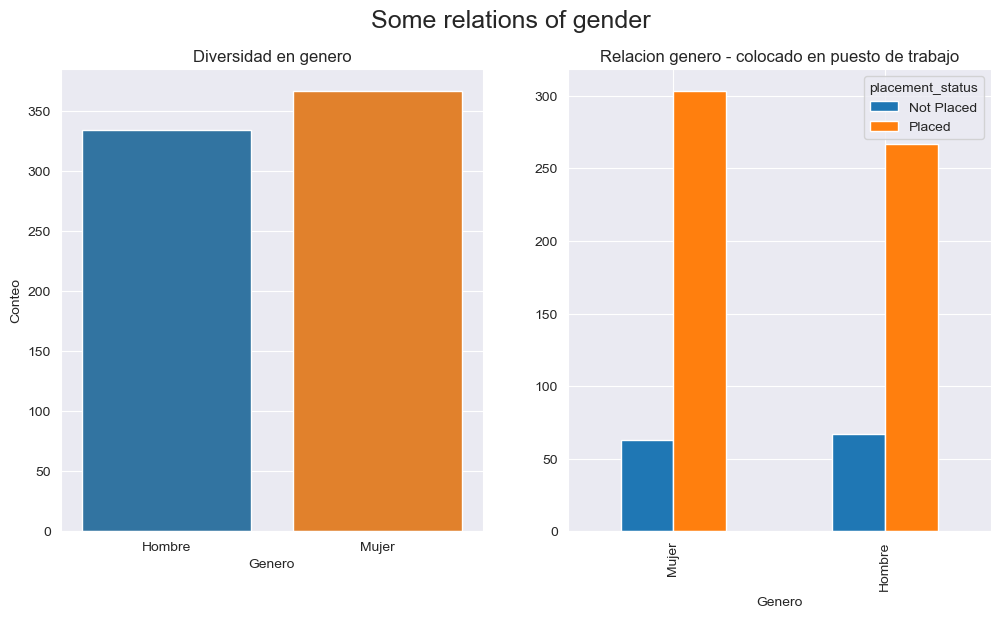

In [17]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=df.gender,ax=ax[0])
ax[0].set_xlabel('Genero')
ax[0].set_ylabel('Conteo')
ax[0].set_xticks([0,1],['Hombre','Mujer'])
ax[0].set_title('Diversidad en genero')

df.groupby('gender')['placement_status'].value_counts().unstack(fill_value=0).plot.bar(ax=ax[1])
ax[1].set_xlabel('Genero')
ax[1].set_xticks([0,1],['Mujer','Hombre'])
ax[1].set_title('Relacion genero - colocado en puesto de trabajo')

fig.suptitle('Some relations of gender',size=18)

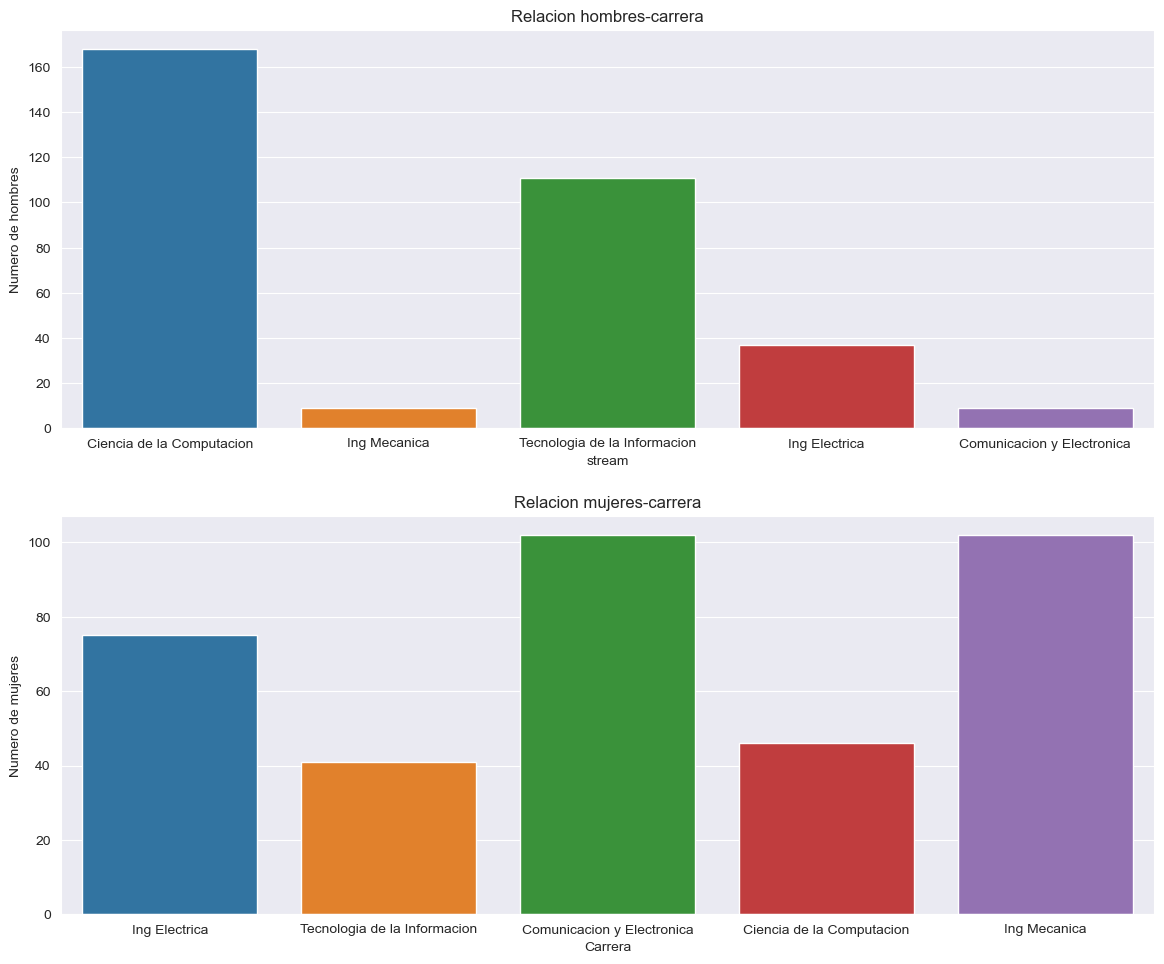

In [34]:
fig0,ax0 = plt.subplots(2,1,figsize=(12,10))

sns.countplot(x=df.loc[df.gender=='Male','stream'],ax=ax0[0])
#ax0[0].set_xlabel('Carrera')
ax0[0].set_ylabel('Numero de hombres')
ax0[0].set_xticks(range(5),['Ciencia de la Computacion','Ing Mecanica','Tecnologia de la Informacion','Ing Electrica','Comunicacion y Electronica'])
ax0[0].set_title('Relacion hombres-carrera')

sns.countplot(x=df.loc[df.gender=='Female','stream'],ax=ax0[1])
ax0[1].set_xlabel('Carrera')
ax0[1].set_ylabel('Numero de mujeres')
ax0[1].set_xticks(range(5),['Ing Electrica','Tecnologia de la Informacion','Comunicacion y Electronica','Ciencia de la Computacion','Ing Mecanica'])
ax0[1].set_title('Relacion mujeres-carrera')

plt.tight_layout(pad=2)

In [38]:
df.loc[df.college_name=='Harvard University']

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
